# Introducción rápida a Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%%timeit
f = '../../data/Temixco_2018_10Min.csv'
pd.read_csv(f,index_col=0,parse_dates=True)


58.5 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
f = '../../data/Temixco_2018_10Min.xlsx'
pd.read_excel(f,index_col=0,parse_dates=True)

3.93 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
f = '../../data/Temixco_2018_10Min.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ib      52423 non-null  float64
 1   Ig      52423 non-null  float64
 2   To      52560 non-null  float64
 3   RH      52560 non-null  float64
 4   WS      52560 non-null  float64
 5   WD      52560 non-null  float64
 6   P       52560 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


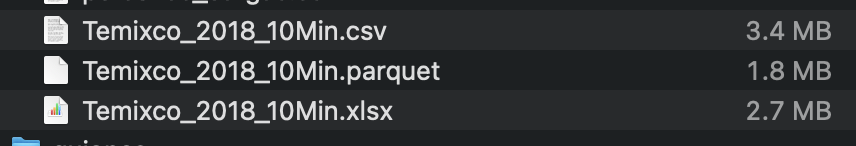

In [10]:
tmx.plot(subplots=True); ## hacer notar que algunas veces toma mucho tiempo

Error in callback <function flush_figures at 0x125cfb7e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

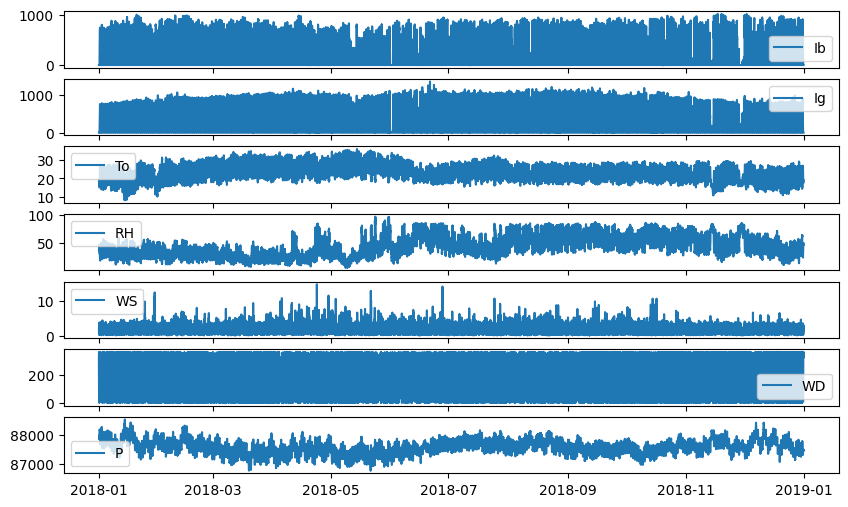

In [9]:
columnas = tmx.columns
fig, ax = plt.subplots(7,figsize=(10,6))

for i,columna in enumerate(columnas):
    ax[i].plot(tmx[columna],label=columna)
    ax[i].legend()
plt.show() 

In [16]:
tmx.mean()

Ib      236.742726
Ig      257.414344
To       22.838098
RH       45.152827
WS        1.905200
WD      210.734453
P     87591.151598
dtype: float64

In [17]:
tmx[['Ig','Ib']].mean()

Ig    257.414344
Ib    236.742726
dtype: float64

In [18]:
tmx.resample('ME').mean()

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-31,229.713302,207.559305,19.598040,33.566660,1.976923,227.108655,87759.582867
2018-02-28,265.335796,245.766019,23.018237,30.830774,1.925072,207.425322,87676.561910
2018-03-31,291.085348,283.570775,25.491299,25.675431,1.969527,197.244648,87425.268981
2018-04-30,236.256088,289.300213,25.529778,31.692567,2.117917,188.417818,87496.062234
2018-05-31,200.070784,270.222629,26.747883,37.973319,2.049228,192.587381,87359.343943
2018-06-30,180.421613,269.410717,22.982317,57.115613,1.787019,194.736577,87552.942243
2018-07-31,276.271034,310.902144,23.816322,44.213600,1.945517,210.220904,87740.813692
2018-08-31,230.954512,286.472724,22.119326,60.574767,1.853452,200.686337,87707.593947
2018-09-30,230.991977,275.230343,22.291153,61.207928,1.853109,213.798792,87532.336271


In [19]:
tmx.loc[tmx.Ig >= 300]

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 09:10:00,533.6,315.4,19.58,34.76,0.842,167.1,88161.86
2018-01-01 09:20:00,556.8,349.5,20.31,33.36,1.198,172.0,88156.05
2018-01-01 09:30:00,574.3,379.8,20.21,32.46,0.947,203.4,88165.92
2018-01-01 09:40:00,589.4,410.6,20.38,31.60,1.457,183.7,88160.85
2018-01-01 09:50:00,611.2,445.6,20.46,31.72,2.448,209.2,88169.38
...,...,...,...,...,...,...,...
2018-12-31 16:00:00,302.3,366.4,25.28,27.20,3.585,211.1,87320.61
2018-12-31 16:10:00,686.4,549.3,25.47,25.88,2.023,181.5,87339.67
2018-12-31 16:20:00,447.8,389.1,25.66,25.96,1.593,172.4,87322.26


In [21]:
# Diccionario de diccionarios
participantes = {
    'Diego': {'Edad': 30, 'Ciudad': 'Campeche'},
    'Nazli': {'Edad': 22, 'Ciudad': 'CdMx'},
    'Kevin': {'Edad': 40, 'Ciudad': 'Cuernavaca'},
    'Gaby': {'Edad': 37, 'Ciudad': 'Cuautla'},

}

# Convertir a DataFrame
participantes_df = pd.DataFrame.from_dict(participantes, orient='index')
participantes_df


,Edad,Ciudad
Diego,30,Campeche
Nazli,22,CdMx
Kevin,40,Cuernavaca
Gaby,37,Cuautla


In [24]:
# Diccionario con tuplas como valores
nombres = {
    'Equipa': [
        ('Diego', 30),
        ('Nazli', 22),
        ('Kevin', 40)
    ]
}

# Convertir a DataFrame
nombres_df = pd.DataFrame(nombres['Equipa'], columns=['Nombre', 'Edad'])
nombres_df

,Nombre,Edad
0,Diego,30
1,Nazli,22
2,Kevin,40


In [25]:

# Diccionario sin fechas
nombres = {
    'Nombre': ['Diego', 'Nazli', 'Kevin'],
    'Edad': [30, 22, 40]
}

# Convertir a DataFrame
nombres_df = pd.DataFrame(nombres_df)
nombres_df


,Nombre,Edad
0,Diego,30
1,Nazli,22
2,Kevin,40


### Algunas cosas  que se pueden hacer con pandas {.unnumbered}

1. Lectura y escritura de datos
   * csv
   * excel
   * clipboard
   * parquet
   * sql
   * hdf5
   * html
3. Limpieza de datos
4. Transformación de datos
5. Visualización rápida de datos
6. Estadística de datos
7. Inspección rápida de estructura y tipos de datos
8. Selección y filtrado de datos
9. Combinación de datos
10. Agrupación de datos